# scatter plot

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## version I
- 一个最普通的散点图

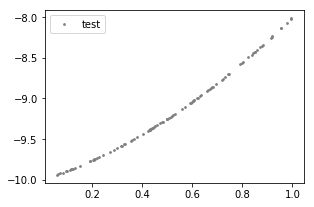

In [60]:
x = np.random.rand(100)
y = x**2 + x - 10
fig = plt.figure()
ax = fig.add_axes((0.2,0.2,0.6,0.6))
ax.scatter(x, y, c=np.array((0.5,0.5,0.5)).reshape((1,-1)), s= 3, label='test')
ax.legend()
plt.show()

## version II
- 根据点的类别不同显示不同的颜色
- 但是无法设置对应的legend

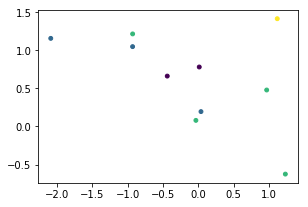

In [43]:
x = np.random.randn(10,2)
# y 也就是label，每个点对应的类别，共有4类
y = np.array([0,1,2,3,2,2,2,0,1,1])
fig=plt.figure()
ax = fig.add_axes((0.2,0.2,0.6,0.6))
ax.scatter(x[:,0],x[:,1],c=y,s=15)
plt.show()

## version III
- 根据点的类别不同设置不同的颜色
- 同时将点的颜色与其对应的类别以legend的形式显示出来

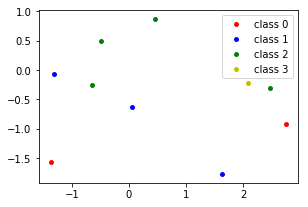

In [44]:
x = np.random.randn(10,2)
# y 也就是label，每个点对应的类别，共有4类
y = np.array([0,1,2,3,2,2,2,0,1,1])
fig=plt.figure()
ax = fig.add_axes((0.2,0.2,0.6,0.6))
colors = ['r', 'b', 'g', 'y']
for i in range(4):
    ax.scatter(x[y==i,0],x[y==i,1], c=colors[i], s=15,label=f'class {i}')

ax.legend()
plt.show()

In [51]:
plt.cm.tab10.colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

In [46]:
np.linspace(0, 1, 8)

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [56]:
plt.cm.tab10(50)

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

# exercise

In [4]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [5]:
categories = np.unique(midwest['category'])

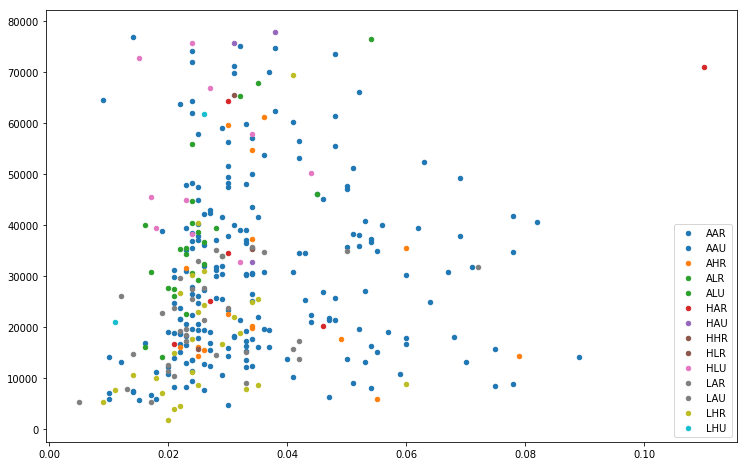

In [5]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes((0.2,0.2,0.6,0.6))

for i in range(len(categories)):
    ax.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

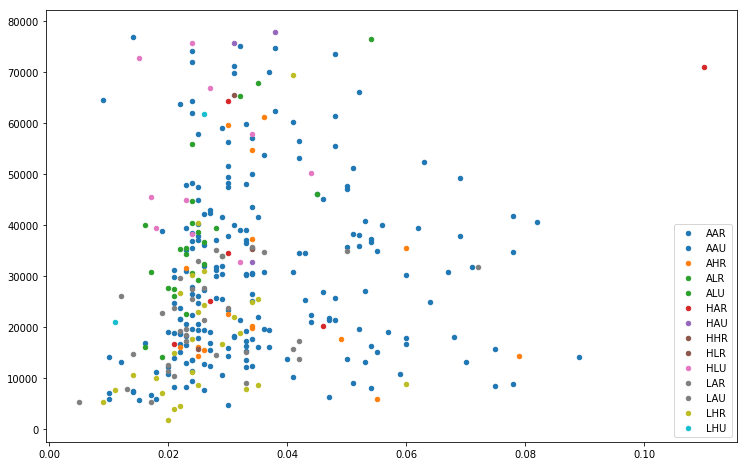

In [6]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_axes((0.2,0.2,0.6,0.6))
colors = [plt.cm.tab10(i/len(categories)) for i in range(len(categories))]
for i in range(len(categories)):
    ax.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(colors[i]).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

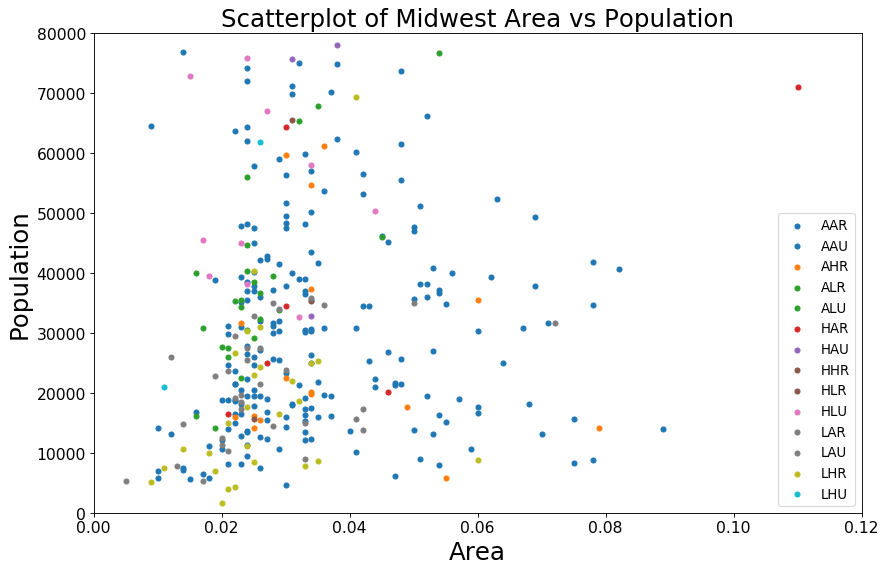

In [7]:
fig = plt.figure(figsize=(16,10), 
                 dpi=80,# 图像分辨率
                facecolor='w', # 图像的背景颜色，设置为白色
                edgecolor='k', # 图像的边框颜色
                )
ax = fig.add_axes((0.2,0.2,0.6,0.6))
for i, category in enumerate(categories):
    ax.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :],
              s=20, c=np.array(colors[i]).reshape(1,-1),
              label=str(category))

ax.set(xlim=(0.0,0.12), ylim=(0,80000))
# tick set
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set(fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set(fontsize=14)
# xlabel, ylabel set 
ax.set_xlabel('Area', fontsize=22)
ax.set_ylabel('Population',fontsize=22)
# title set
ax.set_title('Scatterplot of Midwest Area vs Population', fontsize=22)
ax.legend(fontsize=12)
plt.show()

# bubble chart

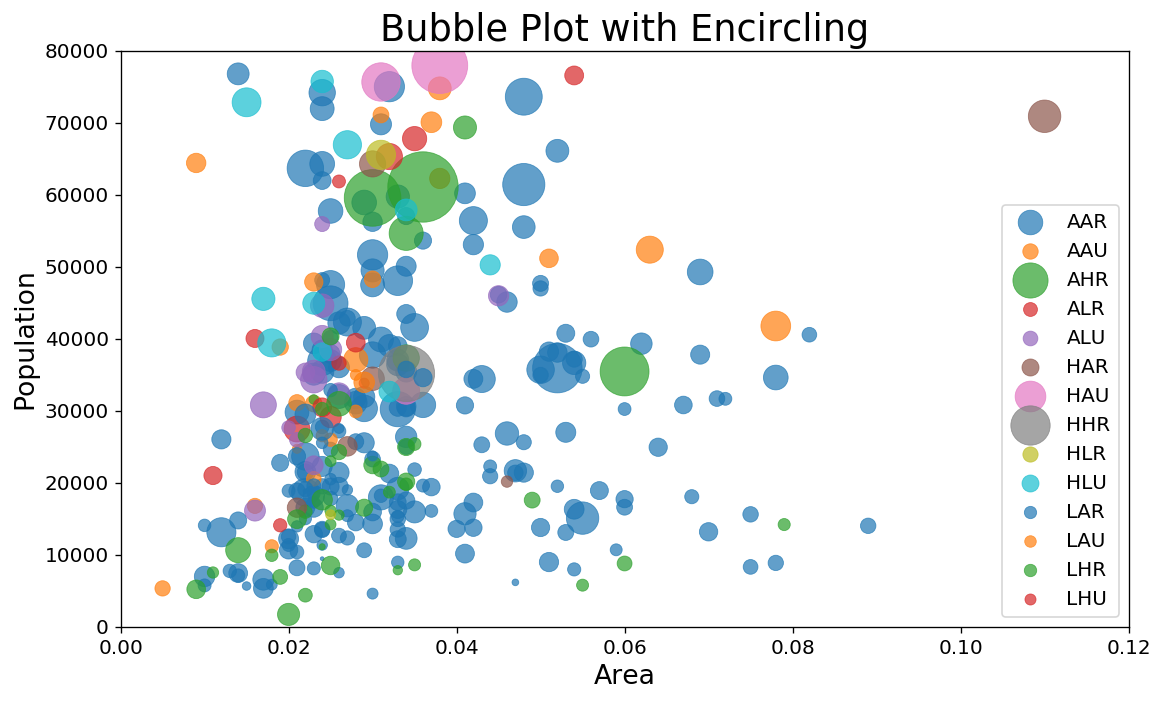

In [20]:
fig = plt.figure(figsize=(14,8), 
                 dpi=120,# 图像分辨率
                facecolor='w', # 图像的背景颜色，设置为白色
                edgecolor='k', # 图像的边框颜色
                )
ax = fig.add_axes((0.2,0.2,0.6,0.6))
colors = [plt.cm.tab10(i/len(categories)) 
          for i in range(len(categories))]

# for i,category in enumerate(categories):
#     ax.scatter('area', 'poptotal', 
#                data=midwest.loc[midwest.category==category,:],
# #               s="popasian", #设置marker size， array like
#                s=midwest.loc[midwest.category==category,"percasian"]*500,
#               alpha=0.7, # 设置透明度
#               linewidths=0.5, 
#                 label =str(category),
#               )

for i, category in enumerate(categories):
    ax.scatter(midwest.loc[midwest.category==category,'area'],
              midwest.loc[midwest.category==category,'poptotal'],
              s=midwest.loc[midwest.category==category,"percasian"]*500,
              alpha=0.7,
              linewidths=0.5,
            label=str(category))
ax.set(xlim=(0.0,0.12), ylim=(0,80000))
# tick set
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set(fontsize=12)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set(fontsize=12)

# xlabel, ylabel set 
ax.set_xlabel('Area', fontsize=16)
ax.set_ylabel('Population',fontsize=16)

# title set
ax.set_title('Bubble Plot with Encircling', fontsize=22)
ax.legend(fontsize =12, markerscale=0.7 )
plt.show()

# bubble chart with text

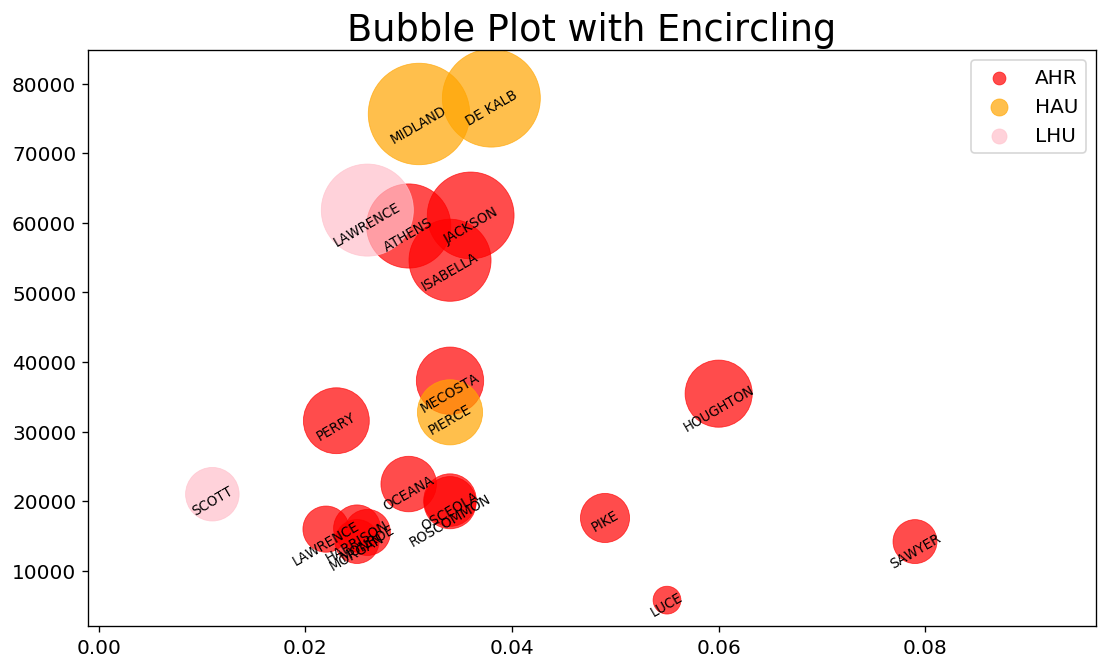

In [29]:
fig = plt.figure(figsize=(14,8), 
                 dpi=120,# 图像分辨率
                facecolor='w', # 图像的背景颜色，设置为白色
                edgecolor='k', # 图像的边框颜色
                )
ax = fig.add_axes((0.2,0.2,0.6,0.6))
colors =  ['red', 'orange', 'pink']
for i,category in enumerate(["AHR", "HAU", "LHU"]):
    data_ = midwest.loc[midwest.category==category, :]
    data_.index = range(data_.shape[0])
    plt.scatter('area', 'poptotal',
               data=data_,
               s=midwest.loc[midwest.category==category, "poppovertyknown"]*0.05,
               c=colors[i],
               edgecolors=colors[i],
               alpha=0.7,
               linewidths=0.5,
               label=category)
    for i in range(midwest.loc[midwest.category==category, :].shape[0]):
        plt.text(data_.loc[i,"area"],
                data_.loc[i,"poptotal"],
                s=data_.loc[i,"county"],
                fontdict={"fontsize":8,
                         "horizontalalignment":'center',
                         "rotation":30})
    
# tick set
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set(fontsize=12)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set(fontsize=12) 
# title set
ax.set_title('Bubble Plot with Encircling', fontsize=22)
ax.legend(fontsize =12, markerscale=0.2)
plt.show()

# bubble chart with encircle

In [6]:
from scipy.spatial import ConvexHull
from matplotlib import patches

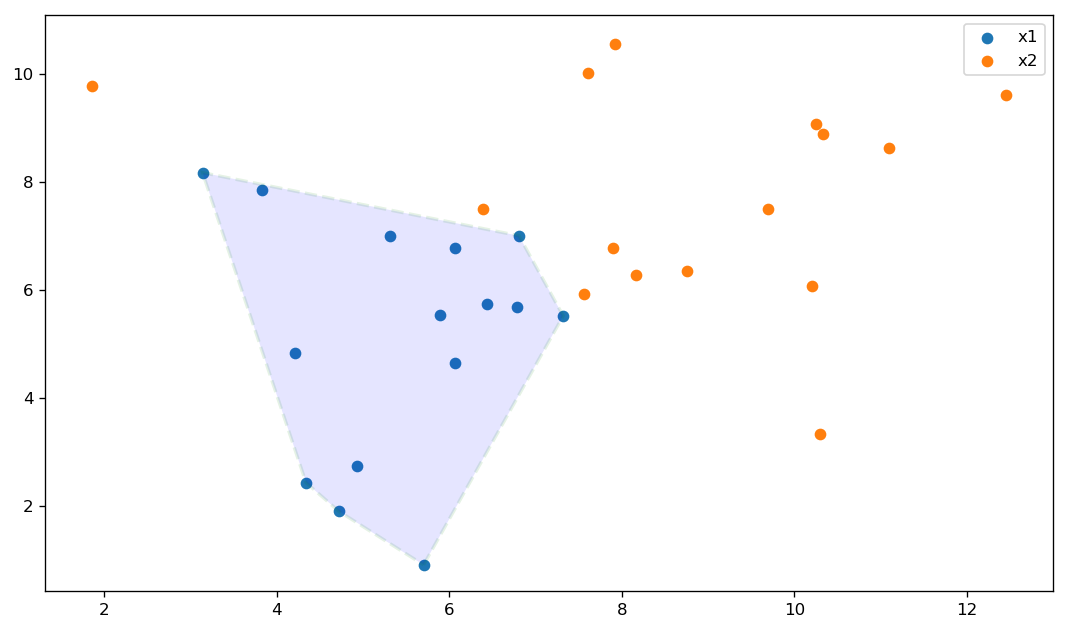

In [19]:
x1,y1 = np.random.normal(loc=5,scale=2,size=(2,15))
x2,y2 = np.random.normal(loc=8,scale=2.5,size=(2,15))
fig = plt.figure(figsize=(14,8), 
                 dpi=120,# 图像分辨率
                facecolor='w', # 图像的背景颜色，设置为白色
                edgecolor='k', # 图像的边框颜色
                )
ax = fig.add_axes((0.2,0.2,0.6,0.6))
ax.scatter(x1,y1,label='x1')
ax.scatter(x2,y2,label='x2')

p = np.stack([x1,y1],axis=1)
hull = ConvexHull(p)
poly = plt.Polygon(p[hull.vertices,:],alpha=0.1,facecolor='b',linewidth=2,edgecolor='g',
                   linestyle='--',joinstyle='miter')
ax.add_patch(poly)
ax.legend()
plt.show()

# 带最佳拟合线的散点图
-  the line of the best fit

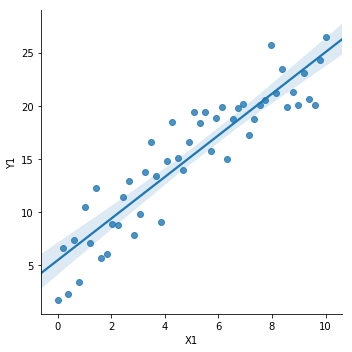

In [3]:
x1 = np.linspace(0,10,50);
y1 = 2*x1 + np.random.random(50)*10;
data = pd.DataFrame({"X1":x1, "Y1":y1})
gridobj = sns.lmplot("X1", "Y1" ,data=data)

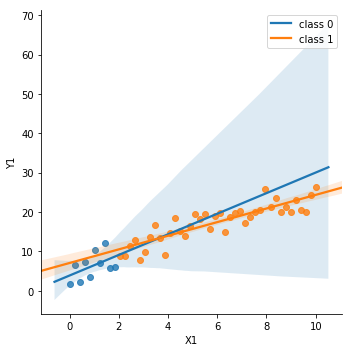

In [11]:
# x2 label
x2 = [0] * 10 +[1] *40
data2 = pd.DataFrame({"X1":x1, "Y1":y1, "X2":x2})
gridobj = sns.lmplot("X1", "Y1" ,data=data2,hue="X2",legend=False)
ax = plt.gca();
ax.legend(["class 0","class 1"])

In [13]:
ax.lines

## exercise

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [44]:
df_select = df.loc[df.cyl.isin([4,8]),:]
sns.set_style("white")

### 两类数据放在一张图

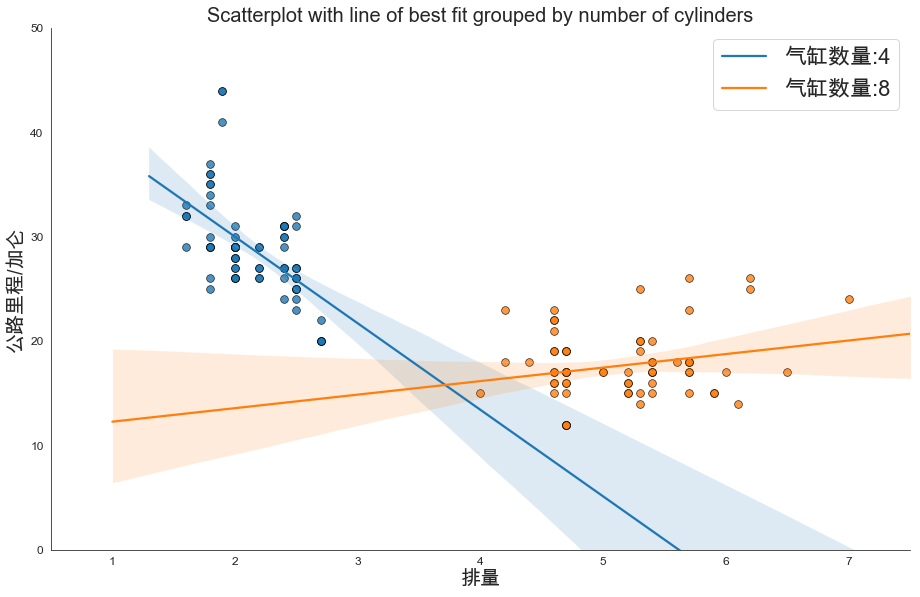

In [53]:
gridobj = sns.lmplot(x="displ", y="hwy",
                    hue="cyl",
                    data=df_select,
                    height=8,
                    aspect=1.6,
                    palette='tab10',
                    legend=False,
                    scatter_kws={'s':60,'linewidth':0.7,'edgecolors':'k'})
gridobj.set(xlim=(0.5,7.5),ylim=(0,50))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = plt.gca();
ax.set_xlabel(u"排量",fontsize=20)
ax.set_ylabel(u"公路里程/加仑",fontsize=20)
ax.set_title("Scatterplot with line of best fit grouped by number of cylinders",fontsize=20)
# tick set
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set(fontsize=12)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set(fontsize=12)
ax.legend(["气缸数量:4","气缸数量:8"],fontsize=22)
plt.show()

### 四类数据放在四张图

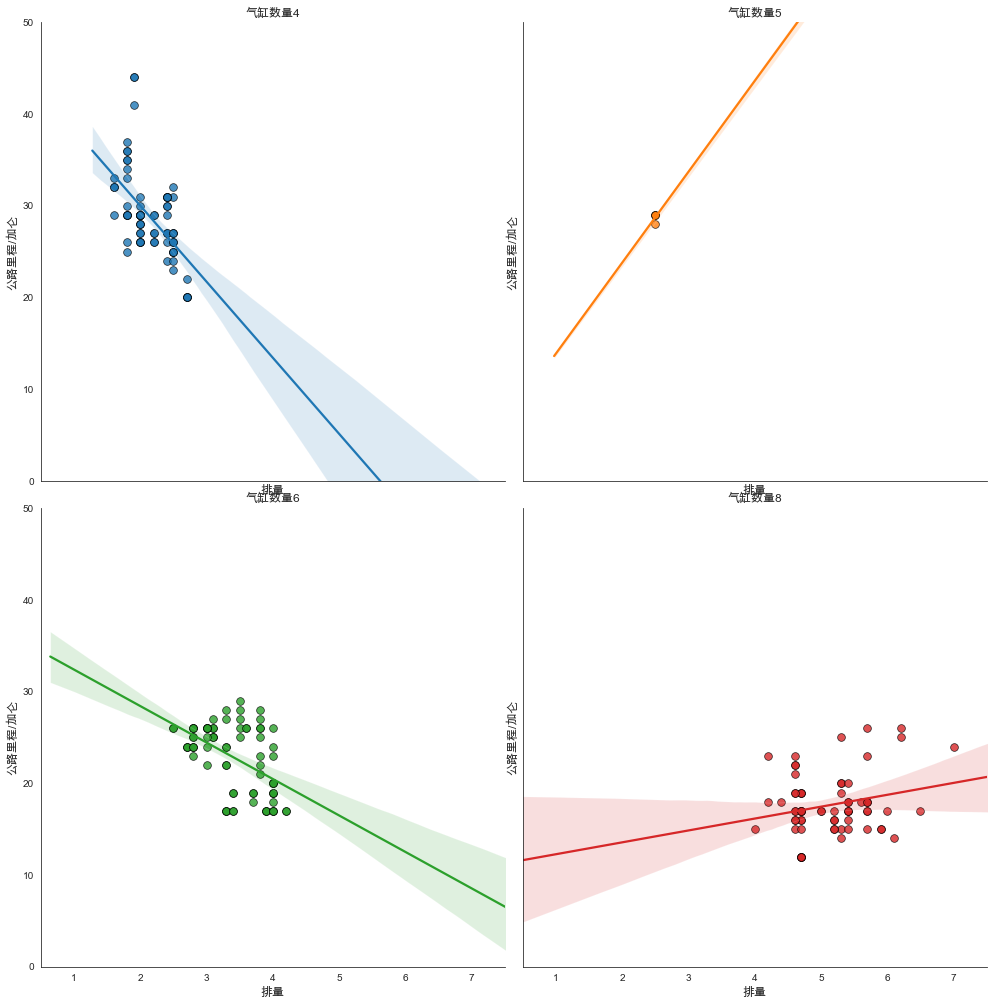

In [63]:
gridobj = sns.lmplot(x="displ", y="hwy",
                    hue="cyl",
                    data=df,
                    height=7,
                    palette='tab10',
                    col = 'cyl',
                     col_wrap=2,
                    legend=False,
                    scatter_kws={'s':60,'linewidth':0.7,'edgecolors':'k'})
gridobj.set(xlim=(0.5,7.5),ylim=(0,50))
fig = plt.gcf()
num = [4,5,6,8]
for i,ax in enumerate(fig.axes):
    ax.set_xlabel(u"排量",fontsize=12)
    ax.set_ylabel(u"公路里程/加仑",fontsize=12)
    ax.set_title(u"气缸数量"+str(num[i]))


# 抖动的带状图

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

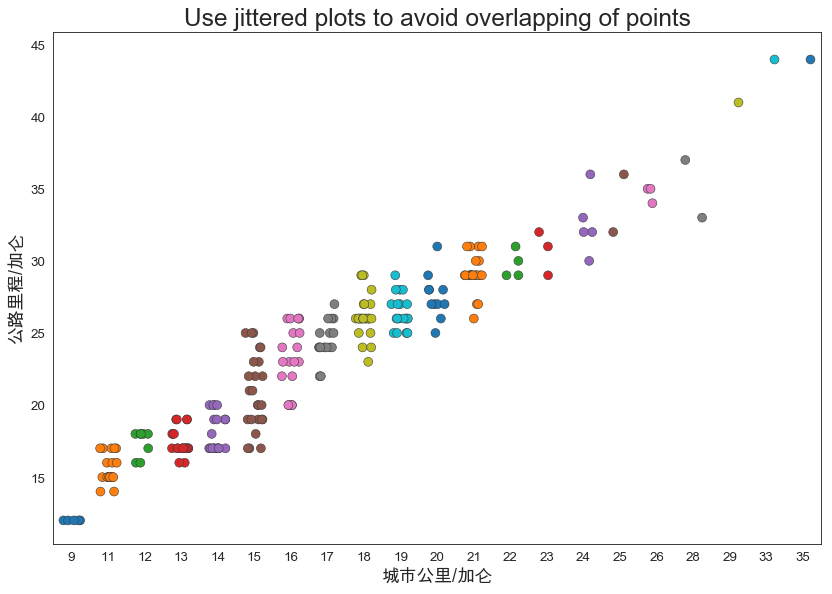

In [71]:
fig = plt.figure(figsize=(12,8),dpi=80) 
ax = fig.add_axes((0.1,0.1,0.8,0.8))
sns.stripplot(df.cty, df.hwy,
            jitter=0.25,
            size=8,
            ax=ax,
            linewidth=0.5,
            palette='tab10')
ax.set_title("Use jittered plots to avoid overlapping of points",fontsize=22)
ax.set_xlabel(u"城市公里/加仑",fontsize=16)
ax.set_ylabel(u"公路里程/加仑",fontsize=16)
# tick set
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set(fontsize=12)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set(fontsize=12)
plt.show()

# 计数图

In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

## 直方图

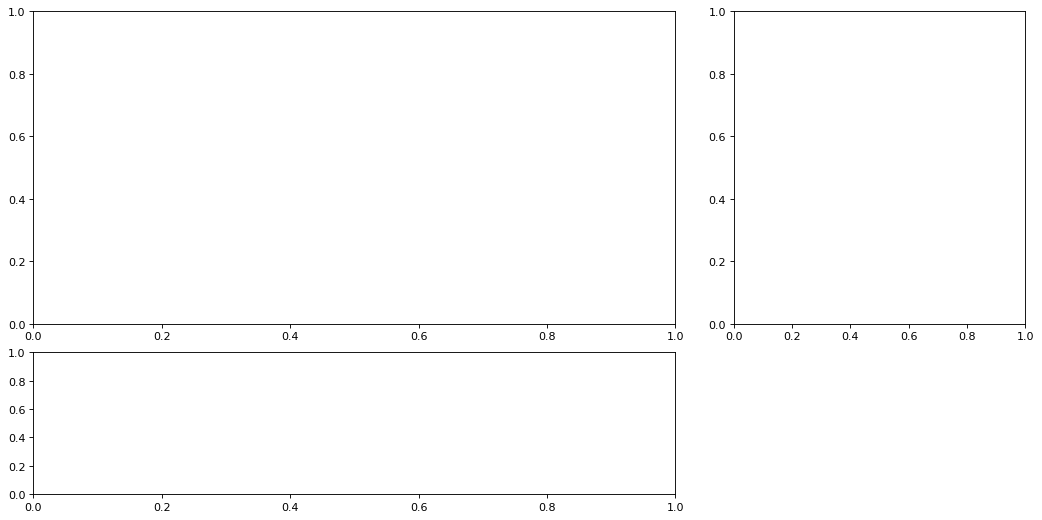

In [6]:
fig = plt.figure(figsize=(16,8),dpi=80)
gs = fig.add_gridspec(3,3)
ax_1 = fig.add_subplot(gs[0:2,0:2])
ax_2 = fig.add_subplot(gs[0:2,2])
ax_3 = fig.add_subplot(gs[2,0:2])


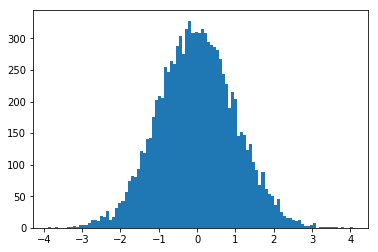

In [8]:
x = np.random.randn(10000)
_ = plt.hist(x,bins=100)
plt.show()

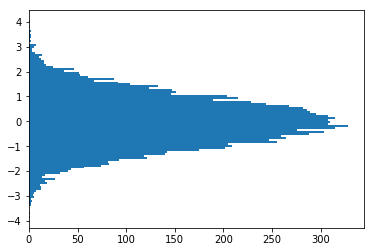

In [9]:
_ = plt.hist(x,bins=100,orientation='horizontal')
plt.show()

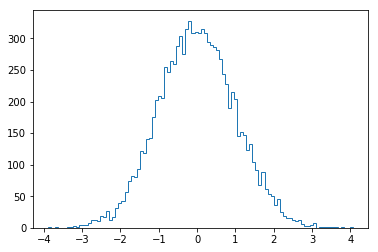

In [10]:
_ = plt.hist(x,bins=100,histtype='step')
plt.show()

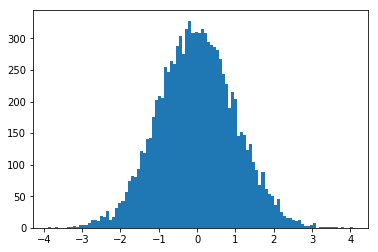

In [13]:
n,bins,patches = plt.hist(x,bins=100,histtype='stepfilled')
plt.show()

## exercise

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

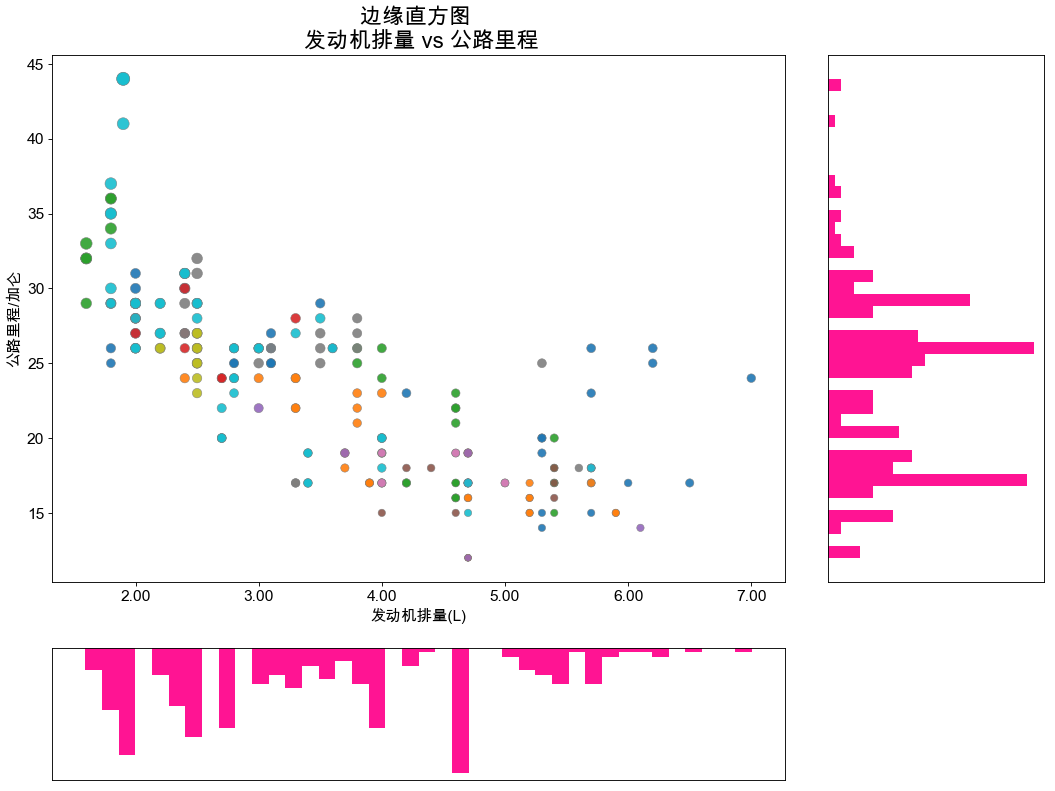

In [78]:
plt.rcParams["font.family"] = 'Arial Unicode MS'

fig = plt.figure(figsize=(16,12),dpi=80)
#注 意这里的hspace 和 wspace的设置，不设置label会挡住
gs = fig.add_gridspec(4,4,hspace=.5,wspace=.2)
ax_1 = fig.add_subplot(gs[0:-1,0:3])
ax_2 = fig.add_subplot(gs[0:3,3],xticklabels=[],yticklabels=[])
ax_3 = fig.add_subplot(gs[-1,0:3],xticklabels=[],yticklabels=[])

ax_1.scatter("displ","hwy",
            s=df.cty*4,
            data=df,
            c=df.manufacturer.astype('category').cat.codes,
             cmap='tab10',
             edgecolors='gray',
             linewidths=0.5,
             alpha=.9)

ax_3.hist(df.displ,40,histtype='stepfilled',
          orientation='vertical',
          color='deeppink')
ax_3.invert_yaxis()

ax_2.hist(df.hwy,40,
          orientation='horizontal',
          histtype='stepfilled',
         color='deeppink')

ax_1.set_title(u"边缘直方图 \n 发动机排量 vs 公路里程", fontsize=20)
ax_1.set_xlabel(u"发动机排量(L)",fontsize=14)
ax_1.set_ylabel(u"公路里程/加仑",fontsize=14)

# tick fontsize set
for tick in (ax_1.xaxis.get_major_ticks() + ax_1.yaxis.get_major_ticks()):
    tick.label1.set_fontsize(14)

# for tick in ax_2.xaxis.get_major_ticks():
#     tick.label1.set_visible(True)
#     tick.label2.set_visible(True)
#     tick.tick2line.set_visible(True)
#     tick.tick1line.set_visible(True)
# for tick in ax_3.yaxis.get_major_ticks():
#     tick.label1.set_visible(True)
#     tick.label2.set_visible(True)
#     tick.tick2line.set_visible(True)
#     tick.tick1line.set_visible(True)

# 去掉直方图上的标尺
ax_2.set_yticks([])
ax_3.set_xticks([])
ax_2.set_xticks([])
ax_3.set_yticks([])

# tick formatter set
import matplotlib
formatter = matplotlib.ticker.StrMethodFormatter('{x:.2f}')
ax_1.xaxis.set_major_formatter(formatter)
plt.show()

In [69]:
ax_1.xaxis.get_majorticklabels()+ax_1.yaxis.get_majorticklabels()

[Text(1.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, 0, '4'),
 Text(5.0, 0, '5'),
 Text(6.0, 0, '6'),
 Text(7.0, 0, '7'),
 Text(8.0, 0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

## 边缘箱线图

In [88]:
x = np.random.rand(10000)

In [101]:
x = np.concatenate([np.random.randint(0,500,100),np.random.randint(500,700,500)])

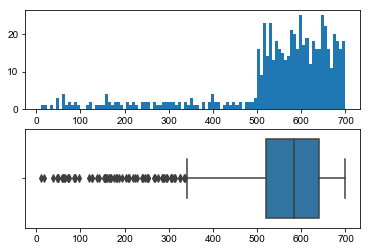

In [102]:
fig,(ax1,ax2) = plt.subplots(2)
ax1.hist(x,bins=100)
sns.boxplot(x=x,ax=ax2)
plt.show()

## exercise

In [103]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

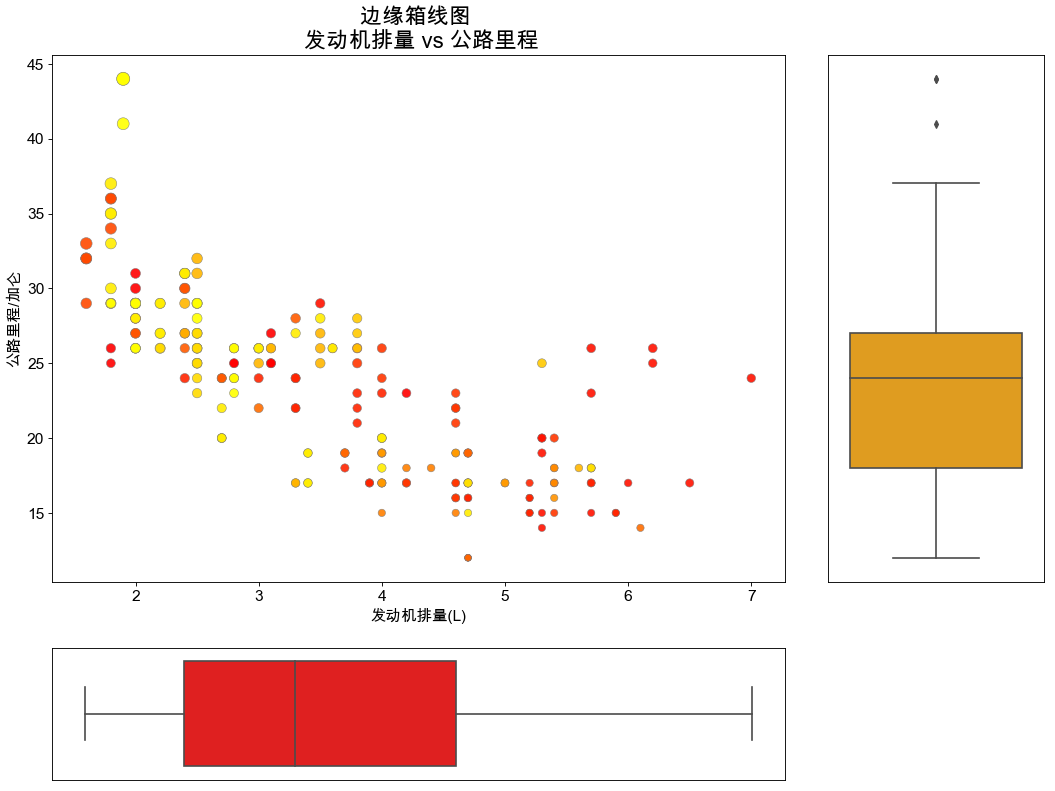

In [115]:
plt.rcParams["font.family"] = 'Arial Unicode MS'

fig = plt.figure(figsize=(16,12),dpi=80)
#注 意这里的hspace 和 wspace的设置，不设置label会挡住
gs = fig.add_gridspec(4,4,hspace=.5,wspace=.2)
ax_1 = fig.add_subplot(gs[0:-1,0:3])
ax_2 = fig.add_subplot(gs[0:3,3],xticklabels=[],yticklabels=[])
ax_3 = fig.add_subplot(gs[-1,0:3],xticklabels=[],yticklabels=[])

ax_1.scatter("displ","hwy",
            s=df.cty*4,
            data=df,
            c=df.manufacturer.astype('category').cat.codes,
             cmap='autumn',
             edgecolors='gray',
             linewidths=0.5,
             alpha=.9)

sns.boxplot(df.displ,ax=ax_3,color='red')
sns.boxplot(df.hwy,ax=ax_2,orient='v',color='orange')

ax_1.set_title(u"边缘箱线图 \n 发动机排量 vs 公路里程", fontsize=20)
ax_1.set_xlabel(u"发动机排量(L)",fontsize=14)
ax_1.set_ylabel(u"公路里程/加仑",fontsize=14)


ax_2.set_ylabel('')
ax_3.set_xlabel('')

# 去掉直方图上的标尺
ax_2.set_yticks([])
ax_3.set_xticks([])
ax_2.set_xticks([])
ax_3.set_yticks([])

# tick fontsize set
for tick in (ax_1.xaxis.get_major_ticks() + ax_1.yaxis.get_major_ticks()):
    tick.label1.set_fontsize(14)

plt.show()

## 相关性矩阵图

In [119]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [120]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [124]:
coef = df.corr(method="pearson")

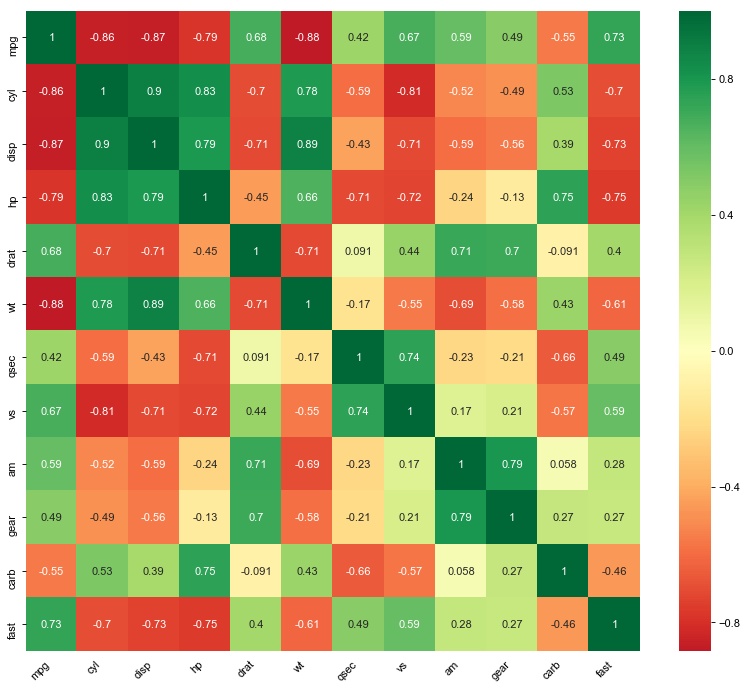

In [157]:
fig = plt.figure(figsize=(12,10),dpi=80)
ax = fig.add_axes((0.1,0.1,0.8,0.8))
sns.heatmap(coef,cmap='RdYlGn',center=0,ax=ax,annot=True)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set(rotation=45,horizontalalignment='right')
    tick.tick1line.set(visible=False)

plt.show()   

## 成对分析图

In [158]:
df = sns.load_dataset('iris')

In [159]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 1280x800 with 0 Axes>

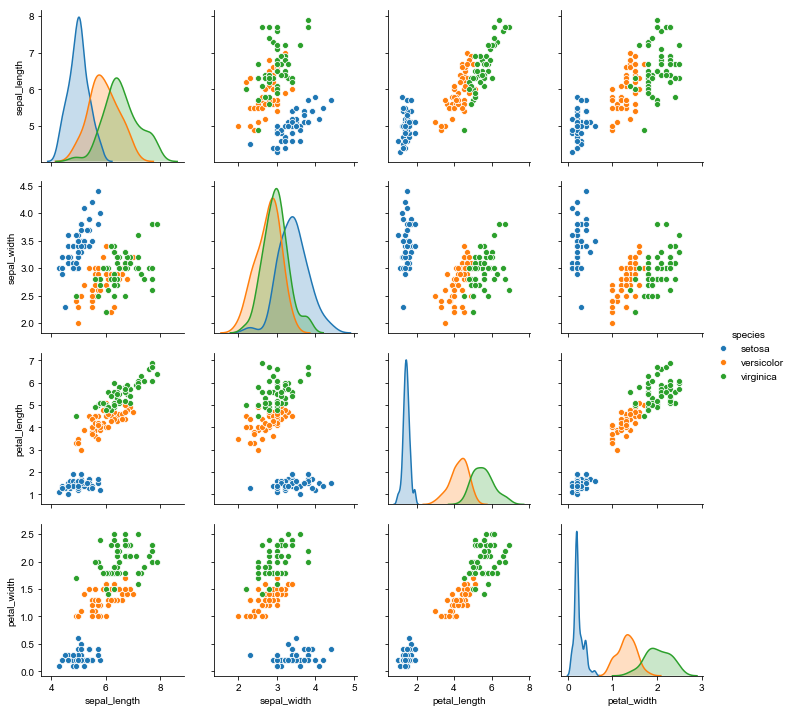

In [161]:
fig = plt.figure(figsize=(16,10),dpi=80)
sns.pairplot(df,kind='scatter',hue='species')

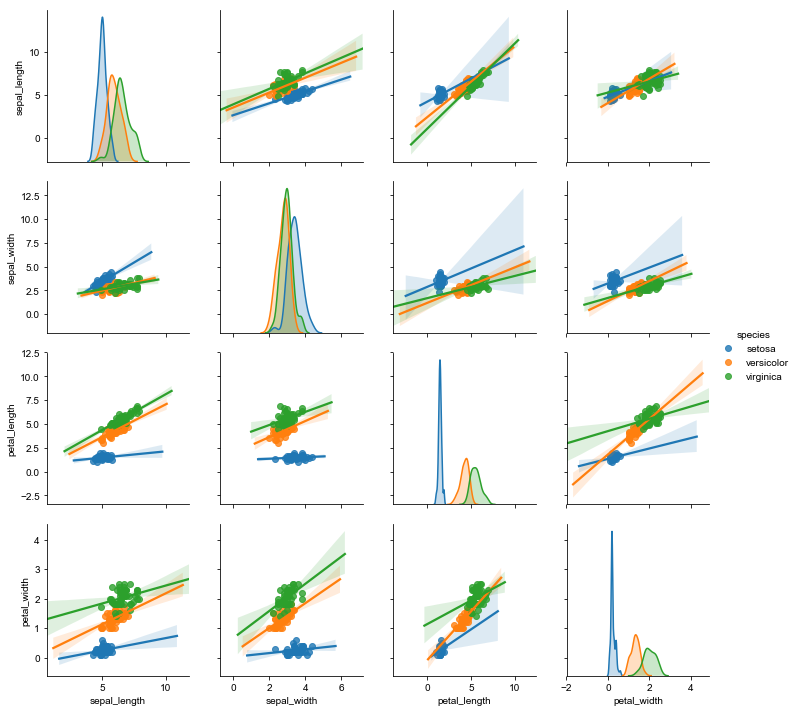

In [162]:
sns.pairplot(df,kind='reg',hue='species')

In [ ]:
chec